In [7]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [3]:
# FEATURE_DIR = '/oasis/projects/nsf/csd395/jiaxuzhu/vgg16_features'
FEATURE_DIR = '/oasis/projects/nsf/csd395/jiaxuzhu/20160109'

In [16]:
from collections import defaultdict

In [18]:
features = defaultdict(list)

for f in os.listdir(FEATURE_DIR):
    prefix, label, sec, suffix = f[:-4].split('_')
    if sec == 120: continue
    if 'patches_12N' in f:
        features['12N'].append(np.load(FEATURE_DIR + '/' + f))
    elif 'patchesBg_12N' in f:
        features['12N_bg'].append(np.load(FEATURE_DIR + '/' + f))
    elif 'patches_Gr' in f:
        features['Gr'].append(np.load(FEATURE_DIR + '/' + f))
    elif 'patchesBg_Gr' in f:
        features['Gr_bg'].append(np.load(FEATURE_DIR + '/' + f))
        
features.default_factory = None

In [19]:
features['Gr'] = np.vstack(features['Gr'])
features['Gr_bg'] = np.vstack(features['Gr_bg'])
features['12N'] = np.vstack(features['12N'])
features['12N_bg'] = np.vstack(features['12N_bg'])

In [25]:
features['12N_neg'] = np.vstack([features['Gr'], features['12N_bg']])

In [26]:
features['Gr_neg'] = np.vstack([features['12N'], features['Gr_bg']])

In [27]:
labels = ['12N', 'Gr', '12N_bg', 'Gr_bg', '12N_neg', 'Gr_neg']

In [155]:
# for label in labels:
#     b = np.ascontiguousarray(features[label]).view(np.dtype((np.void, features[label].dtype.itemsize * features[label].shape[1])))
#     _, idx = np.unique(b, return_index=True)
#     features[label] = features[label][idx]

In [28]:
pooled = {}
for l in labels:
    print l
    x = np.sum(features[l]**3, axis=0)
    pooled[l] = np.sign(x) * np.power(np.abs(x), 1./3)

12N
Gr
12N_bg
Gr_bg
12N_neg
Gr_neg


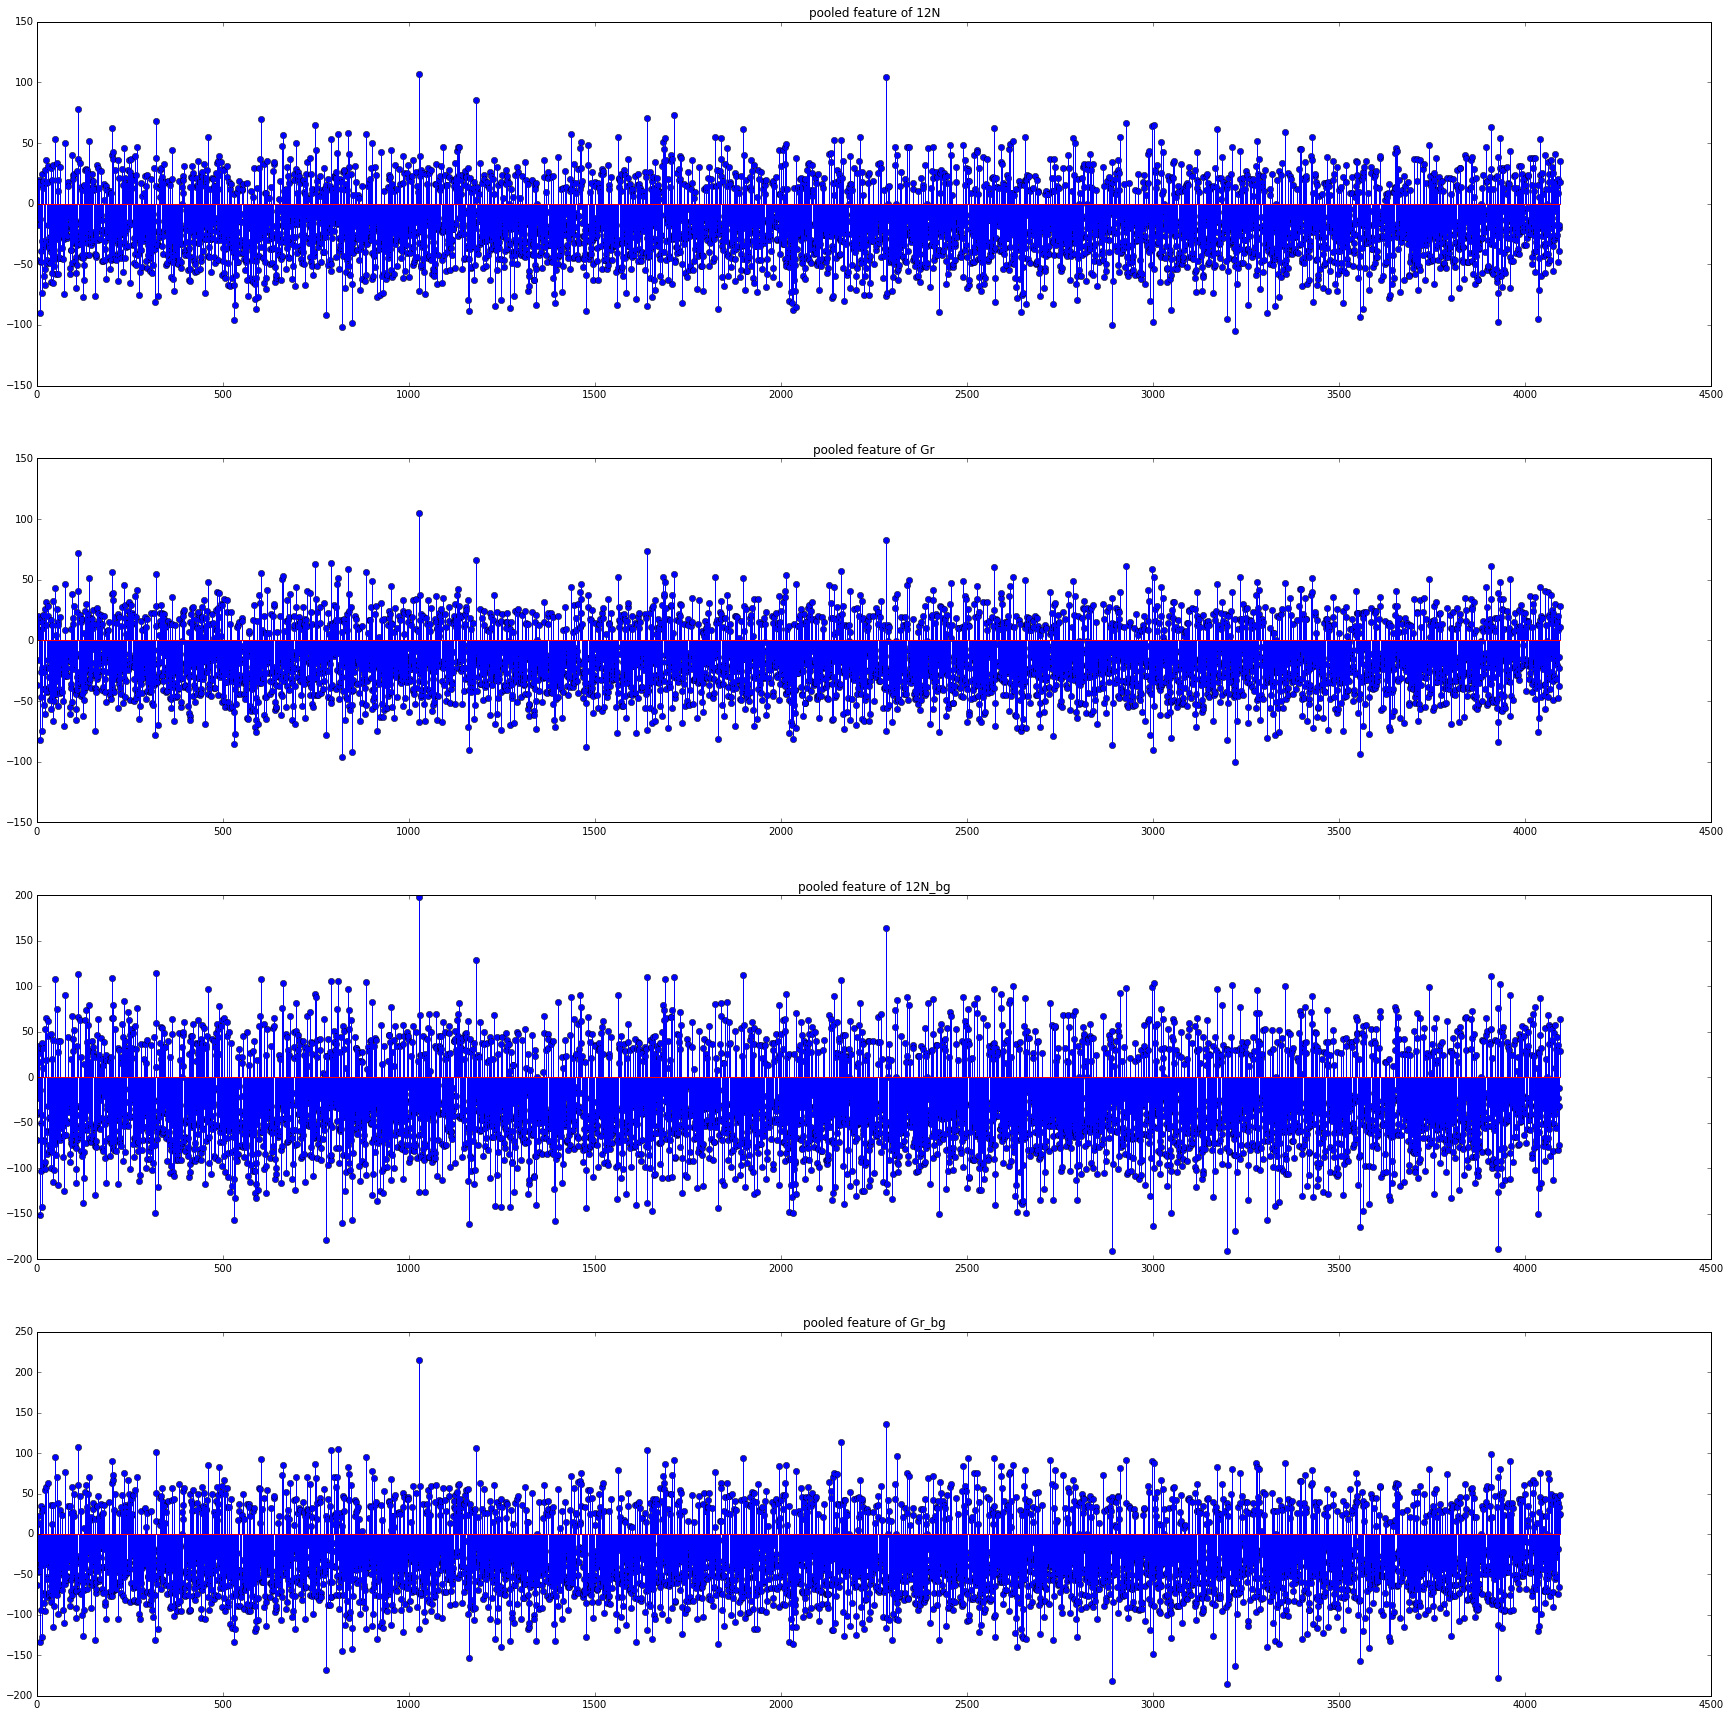

In [22]:
fig, axes = plt.subplots(len(labels), 1, figsize=(30,30))

for i, label in enumerate(labels):
    axes[i].stem(pooled[label])
    axes[i].set_title('pooled feature of %s' % label)

In [77]:
label1 = '12N'
label1_neg = '12N_neg'

# label1 = 'Gr'
# label1_neg = 'Gr_neg'

# label1 = 'LVe'
# label2 = 'SuVe'

In [78]:
most_different_feature_indices = np.argsort(np.abs(pooled[label1] - pooled[label1_neg]))[-100:]

x1 = features[label1][:, most_different_feature_indices]
x1_neg = features[label1_neg][:, most_different_feature_indices]

In [79]:
most_different_feature_indices = np.argsort(np.abs(pooled[label1] - pooled[label1_neg]))[-100:]

x1 = features[label1][:, most_different_feature_indices]
x1_neg = features[label1_neg][:, most_different_feature_indices]

In [80]:
x1.shape[0], x1_neg.shape[0]

(2184, 12593)

In [81]:
from sklearn.svm import SVC

In [82]:
X = np.r_[x1, x1_neg]
Y = np.r_[np.ones(x1.shape[0]), -np.ones(x1_neg.shape[0])]

In [83]:
clf = SVC(probability=True, kernel='linear')
# clf = SVC(probability=True, kernel='poly', degree=3)
# clf = SVC(probability=True, kernel='rbf')

In [84]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [85]:
clf.n_support_

array([1238, 1215], dtype=int32)

In [86]:
x1_test = features[label1][:100, most_different_feature_indices]
x1_neg_test = features[label1_neg][:100, most_different_feature_indices]
X_test = np.r_[x1_test, x1_neg_test]
Y_test = np.r_[np.ones(x1_test.shape[0]), -np.ones(x1_neg_test.shape[0])]

# wrong instances
# wrong_instances1 = np.where((clf.predict(X_test) == 1) & (Y_test == -1))[0]
# err_rate1 = len(wrong_instances1)/float(x1_reduced_test.shape[0])
# print '%s mistaken as %s' % (label1, label2), wrong_instances1, ', error rate = %.3f' % err_rate1

# wrong_instances2 = np.where((clf.predict(X_test) == -1) & (Y_test == 1))[0]
# err_rate2 = len(wrong_instances2)/float(x2_reduced_test.shape[0])
# print '%s mistaken as %s' % (label2, label1), wrong_instances2, ', error rate = %.3f' % err_rate2

In [87]:
print clf.intercept_
print clf.coef_
# only for linear kernel
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print margin

[-0.14284164]
[[ 0.60018574 -0.45031169  0.06007194 -0.0479699   0.14402069 -0.08473793
  -0.39187492  0.17135199  0.07986856  0.03198455 -0.02100877 -0.57046808
   0.05880992  0.04856768  0.51989389 -0.10017752 -0.019274    0.12608626
   0.00598521 -0.61165251 -0.13518943  0.14666345  0.45427263  0.16391733
   0.21281891 -0.39135018 -0.24172162  0.05437202  0.26349408  0.08148272
   0.05053804 -0.2551864   0.20273248  0.07153476 -0.02485492  0.01337868
  -0.10895835 -0.3053443   0.00388592  0.11538294 -0.3880741   0.03928489
   0.39836036  0.45420686  0.2683575  -0.01060691  0.28319105  0.46521135
   0.1902168   0.06352442  0.15969361 -0.00832581  0.05174038 -0.32833122
  -0.0030993  -0.39613467 -0.28395319  0.27391103  0.07826771  0.28418414
   0.63009112  0.16088142 -0.17816425 -0.00738897  0.38072528 -0.07614577
  -0.00303115  0.1658589   0.06743655 -0.08843458  0.20441631 -0.17091455
   0.26838043 -0.36401535 -0.26447024 -0.09061577 -0.02934272 -0.15802167
   0.09085571  0.0180702

In [88]:
np.save('classifiers/%s_non%s_linear_svm_coef.npy' % (label1, label1), clf.coef_)
np.save('classifiers/%s_non%s_linear_svm_intercept.npy' % (label1, label1), clf.intercept_)
np.save('classifiers/%s_non%s_linear_svm_selectedFeatureIndices.npy' % (label1, label1), most_different_feature_indices)

In [89]:
probs = clf.predict_proba(X_test)

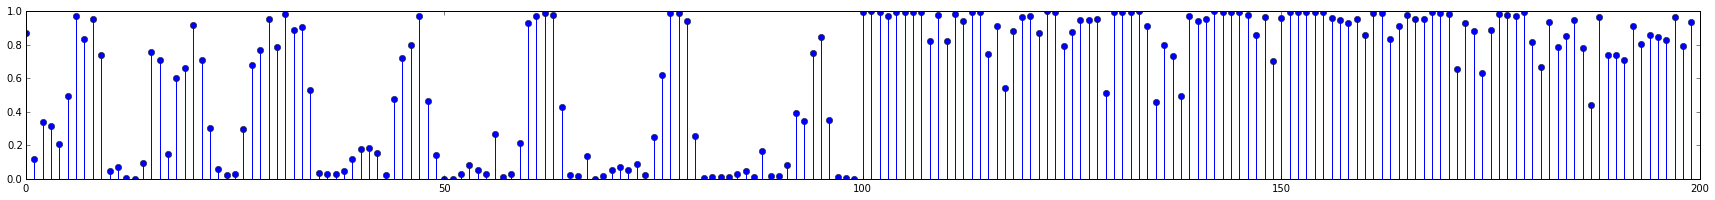

In [90]:
plt.figure(figsize=(30,3));
plt.stem(probs[:,0]);
plt.ylim([0,1]);

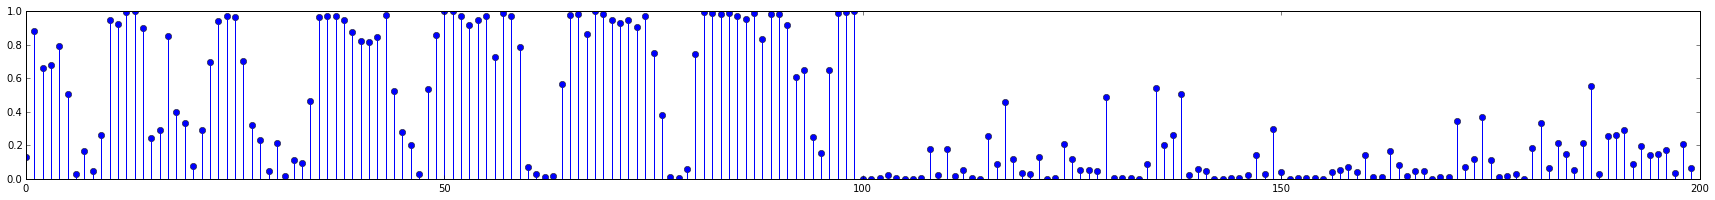

In [91]:
plt.figure(figsize=(30,3));
plt.stem(probs[:, 1]);
plt.ylim([0,1]);

In [12]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10, copy=True, whiten=False)
# pca.fit(features['12N'])